## Random Forest

### EDA

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [6]:
# Reading glass.xlsx file as pandas dataframe

file = pd.ExcelFile('glass.xlsx')
abr = pd.read_excel(file, 'Description')          # Coloumn headers abbreviation sheet
data = pd.read_excel(file, 'glass')         # Main dataframe sheet

In [7]:
abr

Prepare a model for glass classification using Random Forest
0                                   Data Description:          
1                               RI : refractive index          
2   Na: Sodium (unit measurement: weight percent i...          
3                                       Mg: Magnesium          
4                                        AI: Aluminum          
5                                         Si: Silicon          
6                                         K:Potassium          
7                                         Ca: Calcium          
8                                          Ba: Barium          
9                                            Fe: Iron          
10                                                NaN          
11             Type: Type of glass: (class attribute)          
12              1 -- building_windows_float_processed          
13           2 --building_windows_non_float_processed          
14                3 --vehicle_windows_float_processed          
15   4 --vehicle_windows_non_float_processed (none...          
16                                     5 --containers          
17                                      6 --tableware          
18                                      7 --headlamps

In [8]:
data

RI     Na    Mg    Al     Si     K    Ca    Ba   Fe  Type
0    1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.0     1
1    1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.0     1
2    1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.0     1
3    1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.0     1
4    1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.0     1
..       ...    ...   ...   ...    ...   ...   ...   ...  ...   ...
209  1.51623  14.14  0.00  2.88  72.61  0.08  9.18  1.06  0.0     7
210  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59  0.0     7
211  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  1.64  0.0     7
212  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  1.57  0.0     7
213  1.51711  14.23  0.00  2.08  73.36  0.00  8.62  1.67  0.0     7

[214 rows x 10 columns]

In [9]:
# Check for null values
data.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [10]:
# Check for duplicates
data.duplicated().sum()

1

In [11]:
# Remove duplicates
data.drop_duplicates(inplace=True)

In [12]:
# Setting up features and targets
target = data[['Type']]
features = data.drop('Type', axis=1)

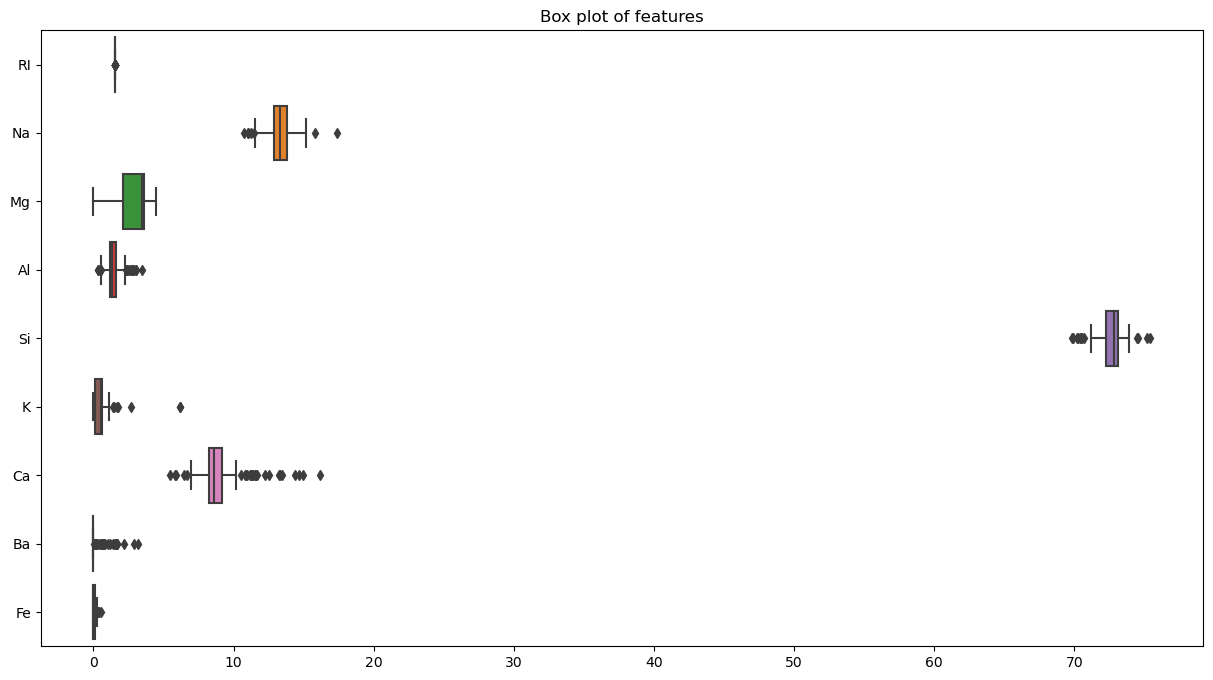

In [13]:
# Check for outliers, if any

# box plot of features
plt.figure(figsize=(15,8))
sns.boxplot(data=features, orient='h')
plt.title('Box plot of features')
plt.show()

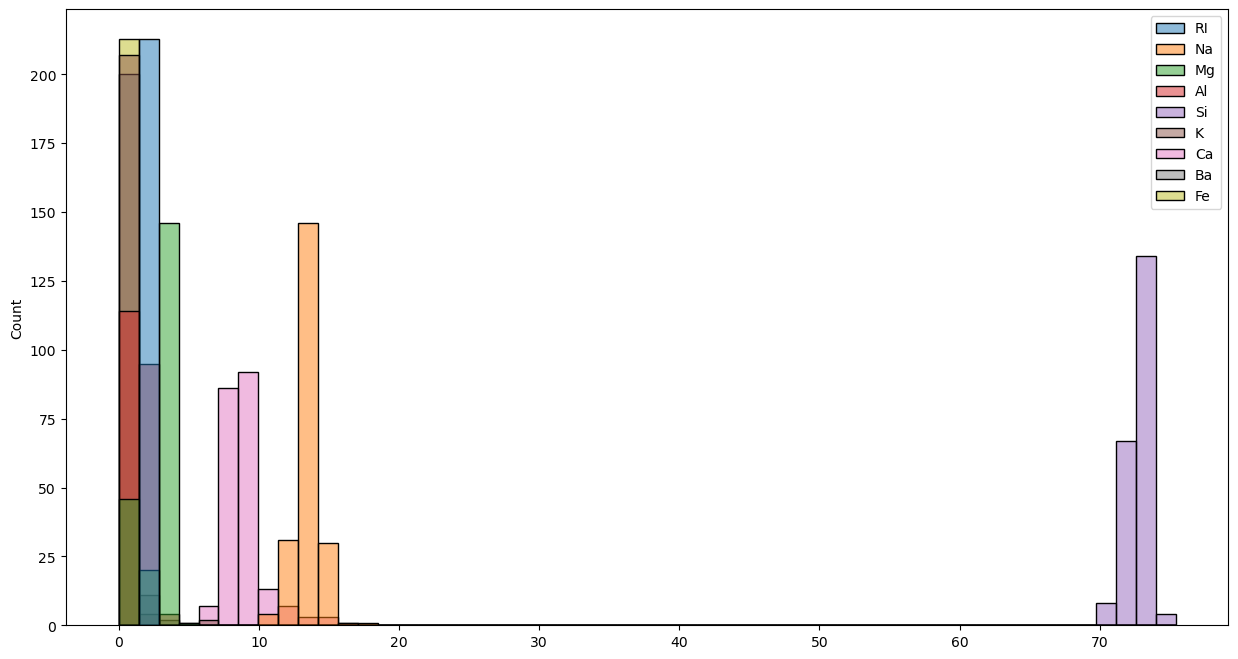

In [15]:
# Histogram plot
plt.figure(figsize=(15,8))
sns.histplot(features)
plt.show()

c:\Users\Administrator\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


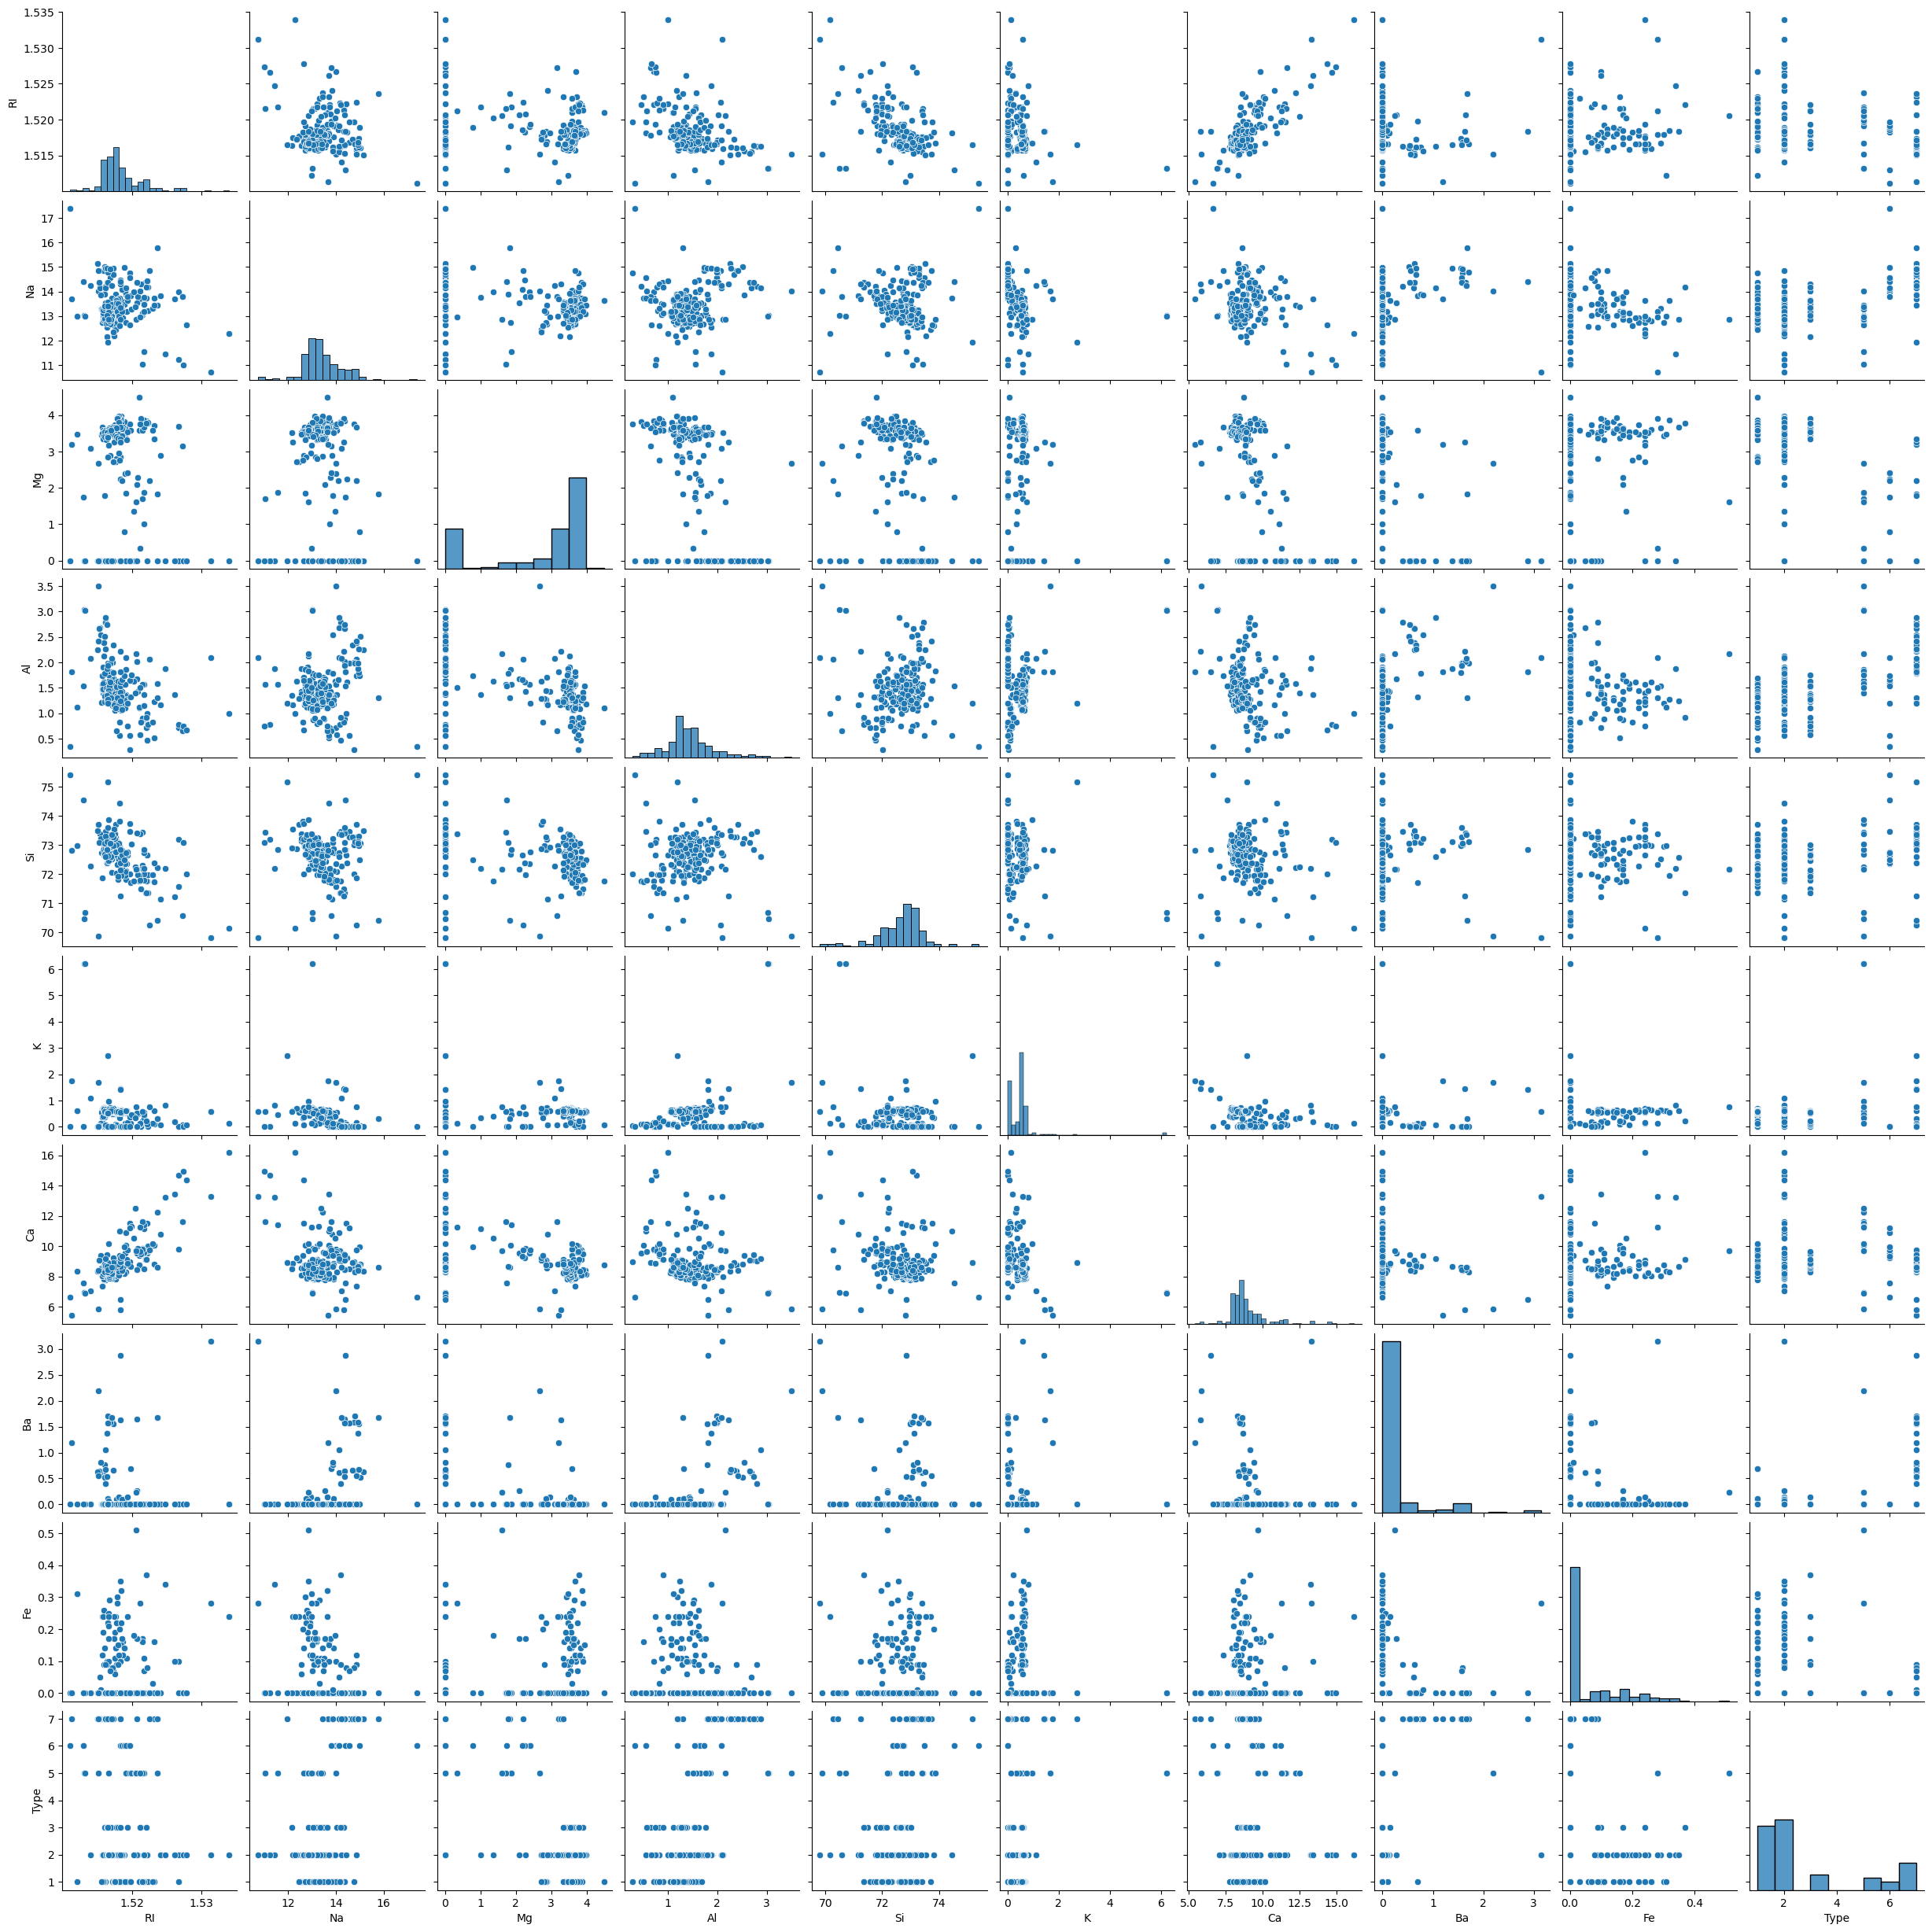

In [16]:
sns.pairplot(data)
plt.show()

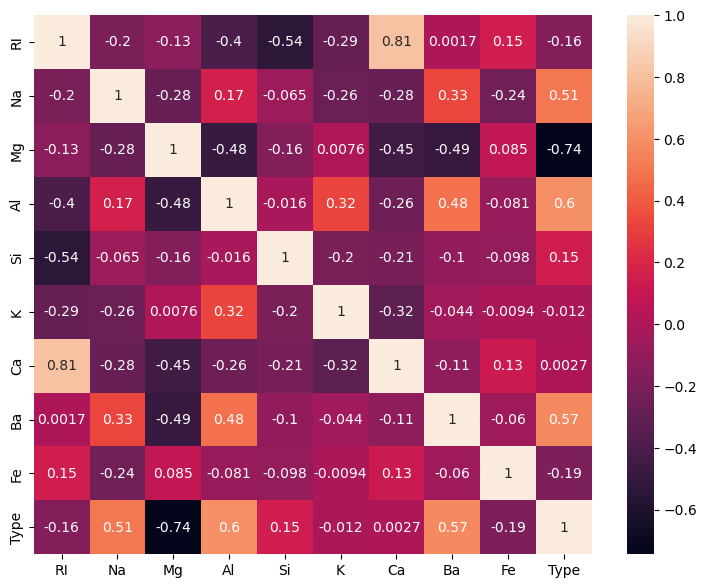

In [18]:
# Correlation matrix
fig, ax = plt.subplots(figsize=(9,7))
sns.heatmap(data.corr(), annot=True)
plt.show()

In [30]:


# Separate features and target
X = data.drop('Type', axis=1)
y = data['Type']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [31]:
# Split into training and testing data
x_train,x_test,y_train,y_test= train_test_split(features,target,train_size=0.7,random_state=100)

In [25]:
# Initiating Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=50,bootstrap=True)

In [26]:
rfc.fit(x_train, y_train)

c:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(n_estimators=50)

In [27]:
y_pred = rfc.predict(x_test)

In [28]:
#Accuracy score

accuracy_score(y_test, y_pred)

0.734375

In [35]:
# Classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.70      1.00      0.82        16
           2       0.76      0.70      0.73        23
           3       0.25      0.25      0.25         4
           5       0.80      0.50      0.62         8
           6       1.00      0.67      0.80         3
           7       0.89      0.80      0.84        10

    accuracy                           0.73        64
   macro avg       0.73      0.65      0.68        64
weighted avg       0.75      0.73      0.73        64



In [37]:
# Applying bagging method

from sklearn.tree import DecisionTreeClassifier
bag_class= BaggingClassifier(DecisionTreeClassifier(),n_estimators=50,bootstrap=True)

In [38]:
bag_class.fit(x_train, y_train)

c:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50)

In [39]:
y_pred = bag_class.predict(x_test)

In [40]:
accuracy_score(y_test, y_pred)

0.75

In [41]:
# Applying Adaboost method

ada_boost= AdaBoostClassifier(DecisionTreeClassifier(),n_estimators=50)

In [45]:
ada_boost.fit(x_train,y_train)

c:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier(estimator=DecisionTreeClassifier())

In [46]:
y_pred= ada_boost.predict(x_test)

In [47]:
accuracy_score(y_test, y_pred)

0.640625

In [50]:
# Applying gradient boost method

grad_boost= GradientBoostingClassifier(n_estimators=50, learning_rate=0.3,max_depth=2)

In [51]:
grad_boost.fit(x_train,y_train)

c:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(learning_rate=0.3, max_depth=2, n_estimators=50)

In [52]:
y_pred = grad_boost.predict(x_test)

In [54]:
accuracy_score(y_test,y_pred)

0.75

Accuracy heirarchy is as follows

Adaboosting method < Gradient boosting method < Random Forest classifier < Bagging method